<a href="https://colab.research.google.com/github/huckfive/ImageClassification/blob/main/Copy_of_Copy_of_CNN_Weed_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [6]:
data_dir = 'data'

In [7]:
data_dir

'data'

In [8]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [9]:
os.listdir(data_dir)

['phragmites', 'leafyspurge', '.ipynb_checkpoints']

In [10]:
for image_class in os.listdir(data_dir):
    print(image_class)

phragmites
leafyspurge
.ipynb_checkpoints


In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

p0003.JPG
p0029.JPG
p0026.JPG
p0027.JPG
p0030.JPG
p0014.JPG
p0019.JPG
p0022.JPG
p0015.JPG
p0017.JPG
p0006.JPG
p0028.JPG
p0012.JPG
p0008.JPG
p0002.JPG
p0024.JPG
p0020.JPG
p0025.JPG
p0010.JPG
p0001.JPG
p0011.JPG
p0023.JPG
p0007.JPG
p0004.JPG
p0016.JPG
p0013.JPG
p0009.JPG
p0021.JPG
p0018.JPG
np0024.JPG
np10.JPG
np0001.JPG
np05.JPG
np02.JPG
pl01.JPG
np15.JPG
np07.JPG
np0023.JPG
np0010.JPG
np0022.JPG
np14.JPG
np0011.JPG
np0020.JPG
np0015.JPG
np08.JPG
np0013.JPG
np0014.JPG
np0029.JPG
np0027.JPG
np0025.JPG
np0002.JPG
pl02.JPG
np0026.JPG
np0021.JPG
np06.JPG
np0006.JPG
np0007.JPG
np0030.JPG
np13.JPG
np0009.JPG
np0019.JPG
np12.JPG
np0004.JPG
np0012.JPG
np0017.JPG
np01.JPG
np03.JPG
np11.JPG
np0005.JPG
np09.JPG
np0018.JPG
np0028.JPG
np0016.JPG
np0003.JPG
np0008.JPG


array([[[217, 207, 189],
        [218, 208, 190],
        [219, 209, 191],
        ...,
        [218, 202, 185],
        [217, 201, 184],
        [216, 200, 183]],

       [[216, 206, 188],
        [217, 207, 189],
        [219, 209, 191],
        ...,
        [219, 203, 186],
        [218, 202, 185],
        [216, 200, 183]],

       [[216, 206, 188],
        [217, 207, 189],
        [219, 209, 191],
        ...,
        [219, 203, 186],
        [218, 202, 185],
        [217, 201, 184]],

       ...,

       [[ 62,  68,  79],
        [ 50,  56,  67],
        [ 49,  56,  65],
        ...,
        [ 57,  81,  93],
        [ 56,  77,  78],
        [ 57,  78,  70]],

       [[ 53,  57,  68],
        [ 38,  40,  51],
        [ 40,  42,  52],
        ...,
        [ 56,  84,  95],
        [ 58,  82,  80],
        [ 63,  87,  77]],

       [[ 41,  43,  54],
        [ 45,  45,  57],
        [ 51,  52,  62],
        ...,
        [ 48,  78,  89],
        [ 58,  85,  82],
        [ 74,  99,  89]]], dtype=uint8)
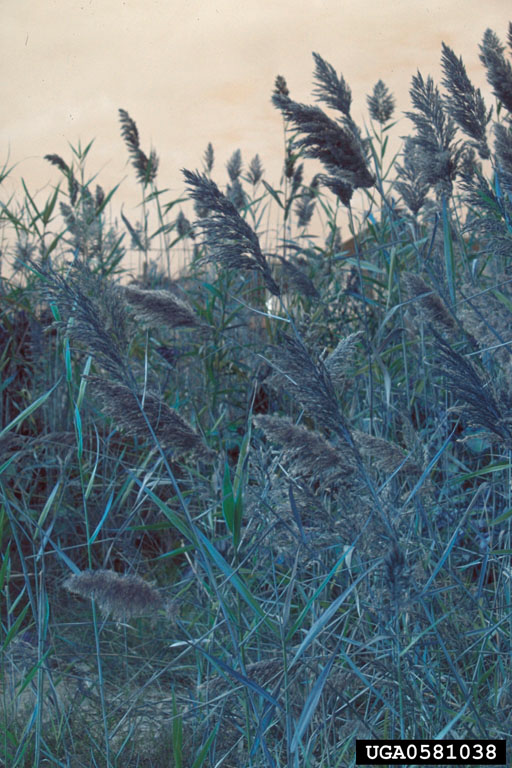

In [16]:
cv2.imread(os.path.join('data', 'phragmites', 'phragmites2010.jpg'))

In [19]:
img = cv2.imread(os.path.join('data', 'phragmites', 'phragmites2010.jpg'))

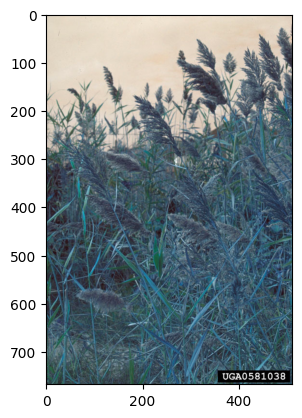

In [20]:
plt.imshow(img)

In [22]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [23]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [24]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 76 files belonging to 2 classes.


In [25]:
data_iterator = data.as_numpy_iterator()

In [26]:
tf.keras.utils.image_dataset_from_directory('data', batch_size=8, image_size=(128, 128))

Found 76 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
batch = data_iterator.next()

In [28]:
batch[0].shape

(32, 256, 256, 3)

In [29]:
batch[1]

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int32)

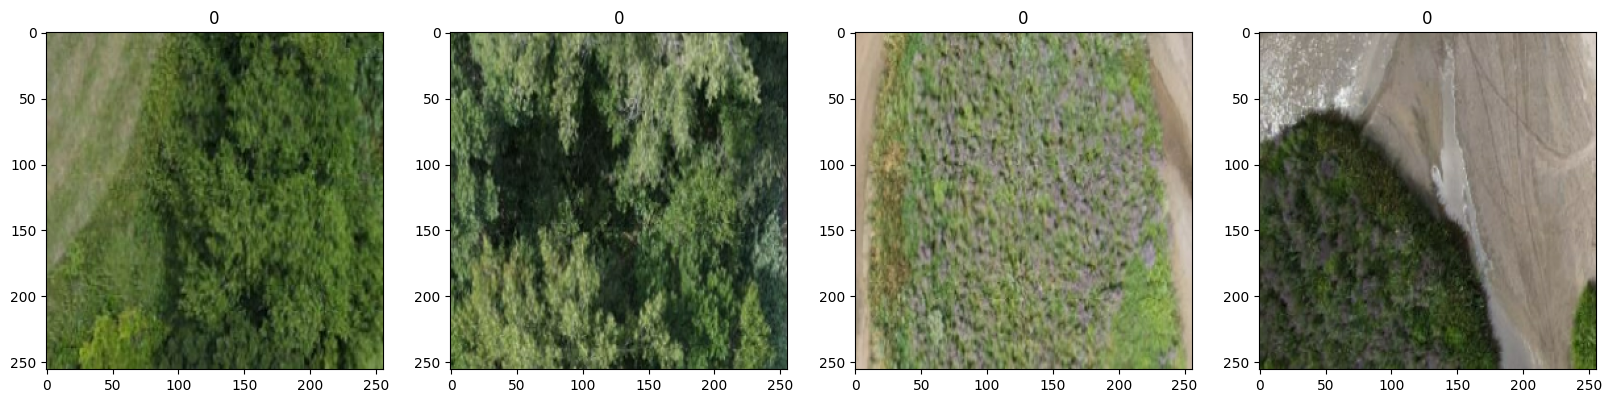

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [31]:
scaled = batch[0] / 255

In [32]:
scaled.min()

0.0

In [33]:
scaled.max()

1.0

In [34]:
data = data.map(lambda x, y: (x / 255, y))

In [35]:
scaled_iterator = data.as_numpy_iterator()

In [36]:
batch = scaled_iterator.next()

In [37]:
batch[0].max()

1.0

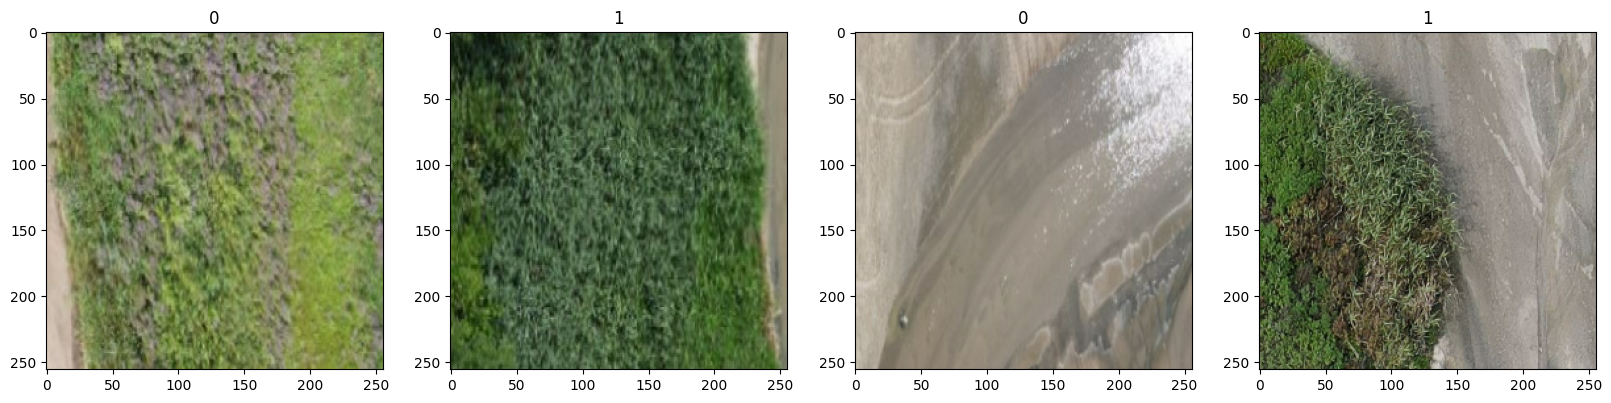

In [38]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [39]:
len(data)

3

In [40]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2) + 1
test_size = int(len(data) * .1) + 1

In [41]:
train_size + val_size + test_size

4

In [42]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [43]:
len(test)

0

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [45]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
logdir = 'logs'

In [49]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [50]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4271 - loss: 0.8638 - val_accuracy: 0.6667 - val_loss: 0.5911
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6875 - loss: 0.5777 - val_accuracy: 0.4167 - val_loss: 0.7393
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4062 - loss: 0.7277 - val_accuracy: 0.0833 - val_loss: 0.7618
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.5729 - loss: 0.6791 - val_accuracy: 0.5833 - val_loss: 0.6571
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.6250 - loss: 0.6556 - val_accuracy: 0.5833 - val_loss: 0.6528
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5625 - loss: 0.6691 - val_accuracy: 0.6667 - val_loss: 0.5768
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6354 - loss: 0.6089 - val_accuracy: 0.5000 - val_loss: 0.6007
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6354 - loss: 0.5643 - val_accuracy: 0.7500 - val_loss: 0.5952
Epoch 9/20
2/2 ━

In [51]:
hist

In [52]:
hist.history

{'accuracy': [0.484375,
  0.640625,
  0.390625,
  0.609375,
  0.609375,
  0.578125,
  0.609375,
  0.65625,
  0.75,
  0.734375,
  0.640625,
  0.75,
  0.8125,
  0.8125,
  0.78125,
  0.828125,
  0.90625,
  0.953125,
  0.953125,
  0.953125],
 'loss': [0.9410667419433594,
  0.6057268381118774,
  0.7317417860031128,
  0.6751167178153992,
  0.6654139757156372,
  0.6545801758766174,
  0.6195971369743347,
  0.5677024126052856,
  0.5757966637611389,
  0.5221685171127319,
  0.5235595703125,
  0.508709192276001,
  0.41772210597991943,
  0.3744979500770569,
  0.3679649531841278,
  0.3426150679588318,
  0.30022478103637695,
  0.22298049926757812,
  0.2039545476436615,
  0.18671253323554993],
 'val_accuracy': [0.6666666865348816,
  0.4166666567325592,
  0.0833333358168602,
  0.5833333134651184,
  0.5833333134651184,
  0.6666666865348816,
  0.5,
  0.75,
  0.8333333134651184,
  0.6666666865348816,
  0.9166666865348816,
  0.9166666865348816,
  0.75,
  0.9166666865348816,
  0.8333333134651184,
  0.916666

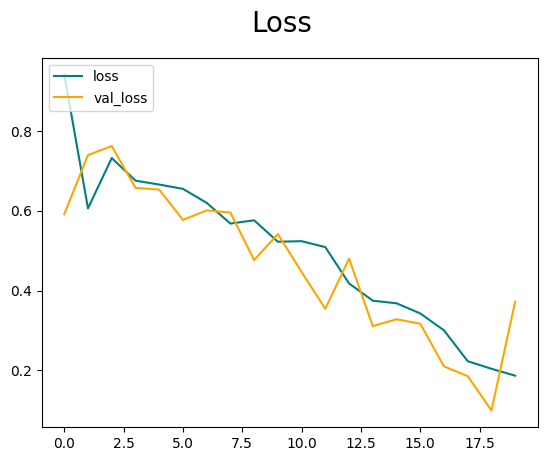

In [53]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

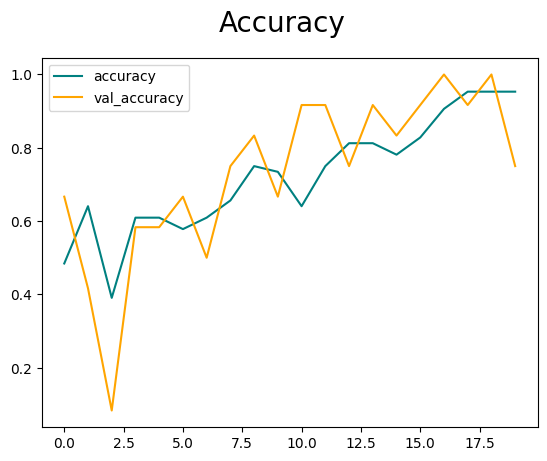

In [54]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [55]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [56]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [57]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [58]:
print((f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}'))


Precision:0.0, Recall:0.0, Accuracy:0.0


In [59]:
import cv2

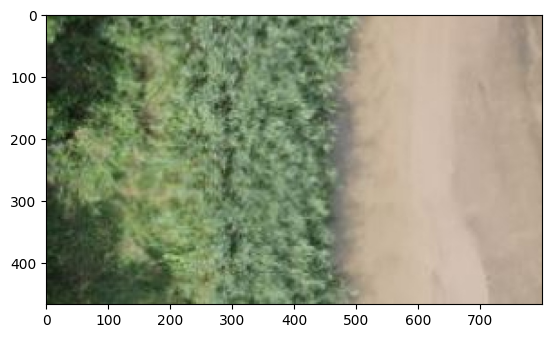

In [61]:
img = cv2.imread('phrag.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

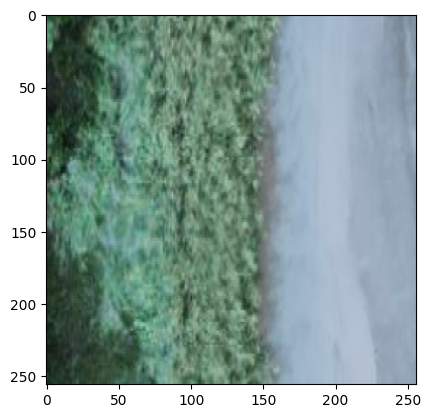

In [62]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [63]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


In [64]:
if yhat > 0.5:
    print(f'Predicted class is Phragmite')
else:
    print(f'Predicted class is Leafy Spurge')

Predicted class is Leafy Spurge
